In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_samples = np.load("../preprocessed/train_split.npy")

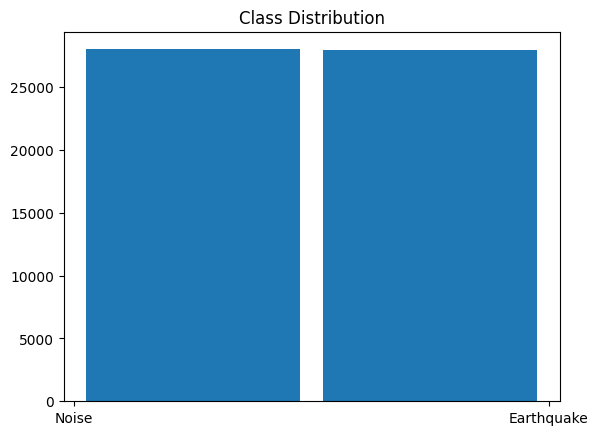

In [3]:
labels = [label for _,label in train_samples]
plt.hist(labels,bins=2,rwidth=0.9)
plt.xticks([0,1],['Noise','Earthquake'])
plt.title('Class Distribution')
plt.show()

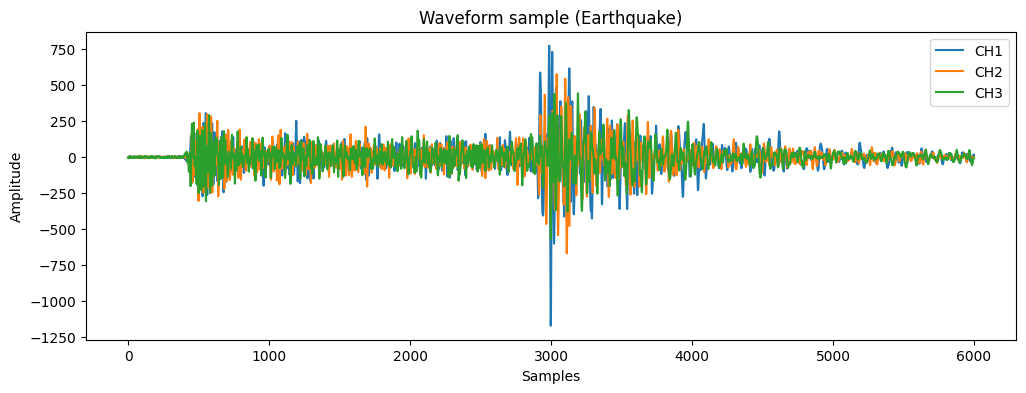

In [20]:
import h5py

hdf5_path = "../data/merge.hdf5"


with h5py.File(hdf5_path,"r") as hdf5_file:
  key,label = train_samples[4]
  label = int(label)
  waveform = hdf5_file['data'][key][:]
  plt.figure(figsize=(12,4))
  plt.plot(waveform[:,0],label='CH1')
  plt.plot(waveform[:,1],label='CH2')
  plt.plot(waveform[:,2],label='CH3')
  plt.title(f"Waveform sample ({'Earthquake' if label==1 else 'Noise'})")
  plt.xlabel("Samples")
  plt.ylabel("Amplitude")
  plt.legend()
  plt.show()

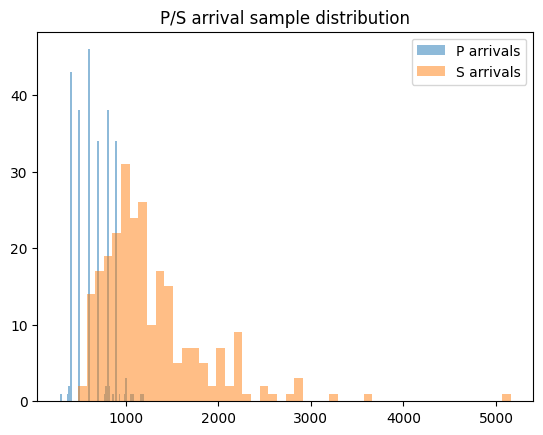

In [22]:
p_arrivals = []
s_arrivals = []

with h5py.File(hdf5_path,'r') as hdf5_file:
  for key,label in train_samples[:500]:
    attrs = hdf5_file['data'][key].attrs
    if label=='1':
      p_arrivals.append(attrs['p_arrival_sample'])
      s_arrivals.append(attrs['s_arrival_sample'])

plt.hist(p_arrivals,bins=50,alpha=0.5,label='P arrivals')
plt.hist(s_arrivals,bins=50,alpha=0.5,label='S arrivals')
plt.title('P/S arrival sample distribution')
plt.legend()
plt.show()